# By Eisha Goel                                                                                                  
# The Sparks Foundation                                                                                    
# Data Science & Business Analytics Intern





# Task-3: Exploratory Data Analysis - Retail 





## Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

## Solution: In this task I did the Exploratory Data Analysis on dataset 'SampleSuperstore' as the business owner of the retail firm and finded out the weak areas where I can work to make more profit.

## Data Source: https://bit.ly/3i4rbWl

In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from plotly import __version__
import cufflinks as cf

In [3]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
init_notebook_mode(connected=True)

cf.go_offline()

In [4]:
#Reading the data from a .csv file

df = pd.read_csv("C:/Users/Eisha Goel/Desktop/Machine Learning/SampleSuperstore.csv",header=0)

In [5]:
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [6]:
df.tail()

Ship Mode   Segment        Country         City       State  \
9989    Second Class  Consumer  United States        Miami     Florida   
9990  Standard Class  Consumer  United States   Costa Mesa  California   
9991  Standard Class  Consumer  United States   Costa Mesa  California   
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480

In [7]:
df.shape

(9994, 13)

In [8]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Finding out the duplicate rows in the dataset and dropping them 

In [10]:
df.duplicated().sum()

17

In [11]:
df.drop_duplicates(keep="first", inplace=True)
df.shape

(9977, 13)

## Correlation Analysis

In [12]:
correlation=df.corr()
correlation

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023476  0.013110  0.059225 -0.029892
Sales          -0.023476  1.000000  0.200722 -0.028311  0.479067
Quantity        0.013110  0.200722  1.000000  0.008678  0.066211
Discount        0.059225 -0.028311  0.008678  1.000000 -0.219662
Profit         -0.029892  0.479067  0.066211 -0.219662  1.000000

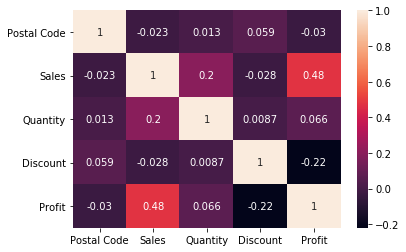

In [13]:
sns.heatmap(correlation,annot=True)

In [14]:
data_con=df.select_dtypes(include=[np.number])

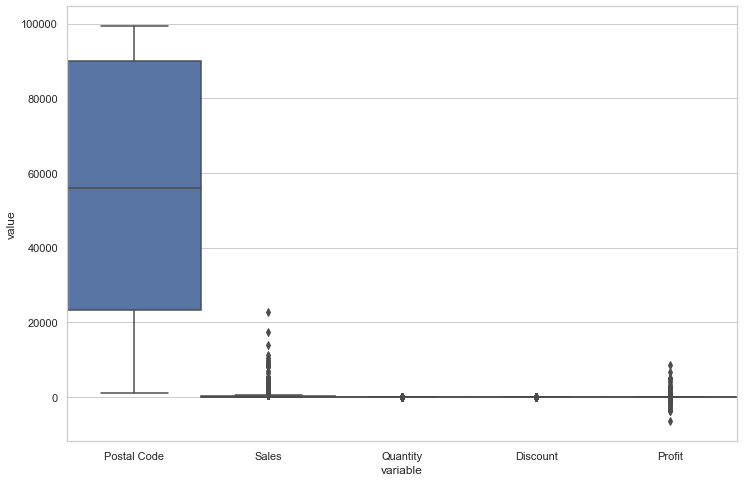

In [15]:
#BoxPlot

plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(data_con), width=1)

plt.show()

In [16]:
data_con.iplot(kind='box')

## Removing Outliers from the dataset

In [17]:
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [18]:
remove_outlier(df,k=3.33)

In [19]:
ds_con=ds.select_dtypes(include=[np.number])
ds_con.iplot(kind='box')

In [20]:
ds.shape

(9889, 13)

In [21]:
ds.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [22]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9889 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9889 non-null   object 
 1   Segment       9889 non-null   object 
 2   Country       9889 non-null   object 
 3   City          9889 non-null   object 
 4   State         9889 non-null   object 
 5   Postal Code   9889 non-null   int64  
 6   Region        9889 non-null   object 
 7   Category      9889 non-null   object 
 8   Sub-Category  9889 non-null   object 
 9   Sales         9889 non-null   float64
 10  Quantity      9889 non-null   int64  
 11  Discount      9889 non-null   float64
 12  Profit        9889 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [23]:
ds.describe()

Postal Code        Sales     Quantity     Discount       Profit
count   9889.000000  9889.000000  9889.000000  9889.000000  9889.000000
mean   55243.565173   196.570036     3.776519     0.155131    24.150294
std    32060.297300   383.949264     2.222506     0.204991    94.164961
min     1040.000000     0.444000     1.000000     0.000000  -734.526400
25%    23223.000000    17.088000     2.000000     0.000000     1.747200
50%    57103.000000    52.990000     3.000000     0.200000     8.611200
75%    90008.000000   203.520000     5.000000     0.200000    28.857600
max    99301.000000  8187.650000    14.000000     0.800000   793.716000

In [24]:
ds.iplot(x="Region", y="Sales",kind='bar',title='Region VS Sales',xTitle='Region',yTitle='Sales')

In [25]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [26]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

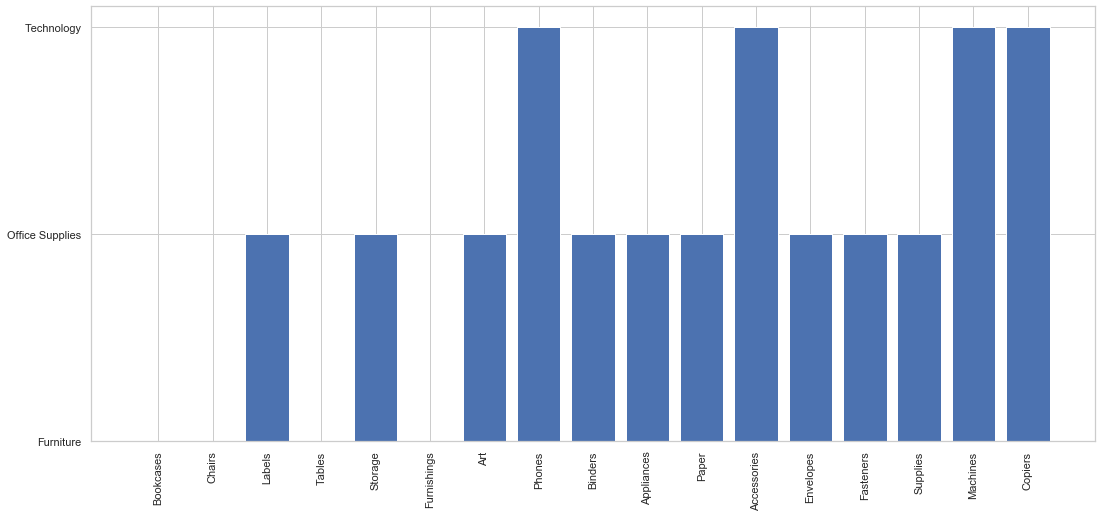

In [27]:
plt.figure(figsize=(18,8))
plt.bar('Sub-Category', 'Category', data=df)
plt.xticks(rotation=90)

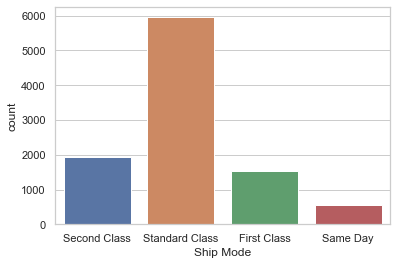

In [28]:
sns.countplot(x='Ship Mode',data=df)

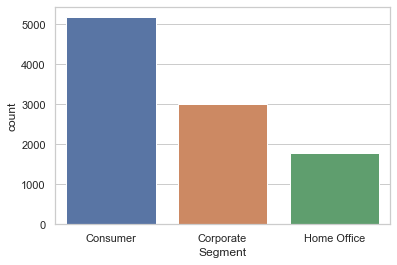

In [29]:
sns.countplot(x='Segment',data=df)

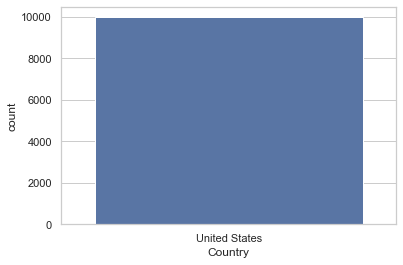

In [30]:
sns.countplot(x='Country',data=df)

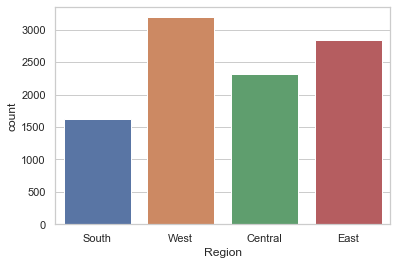

In [31]:
sns.countplot(x='Region',data=df)

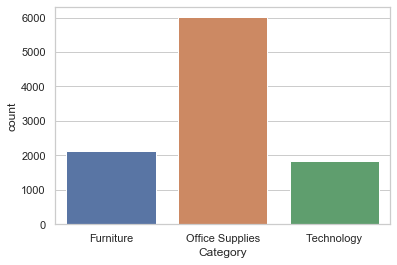

In [32]:
sns.countplot(x='Category',data=df)

In [33]:
del ds['Country']

In [34]:
ds.head()

Ship Mode    Segment             City       State  Postal Code Region  \
0    Second Class   Consumer        Henderson    Kentucky        42420  South   
1    Second Class   Consumer        Henderson    Kentucky        42420  South   
2    Second Class  Corporate      Los Angeles  California        90036   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida        33311  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida        33311  South   

          Category Sub-Category     Sales  Quantity  Discount    Profit  
0        Furniture    Bookcases  261.9600         2      0.00   41.9136  
1        Furniture       Chairs  731.9400         3      0.00  219.5820  
2  Office Supplies       Labels   14.6200         2      0.00    6.8714  
3        Furniture       Tables  957.5775         5      0.45 -383.0310  
4  Office Supplies      Storage   22.3680         2      0.20    2.5164

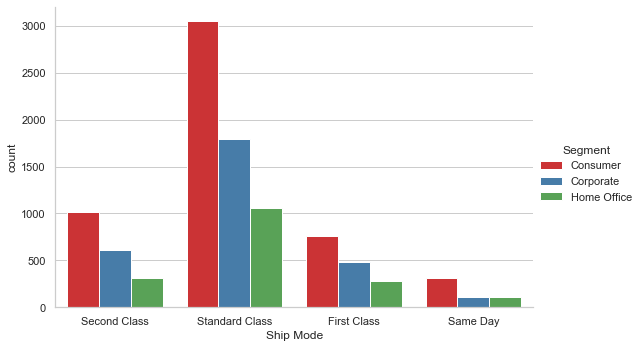

In [35]:
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="Set1")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

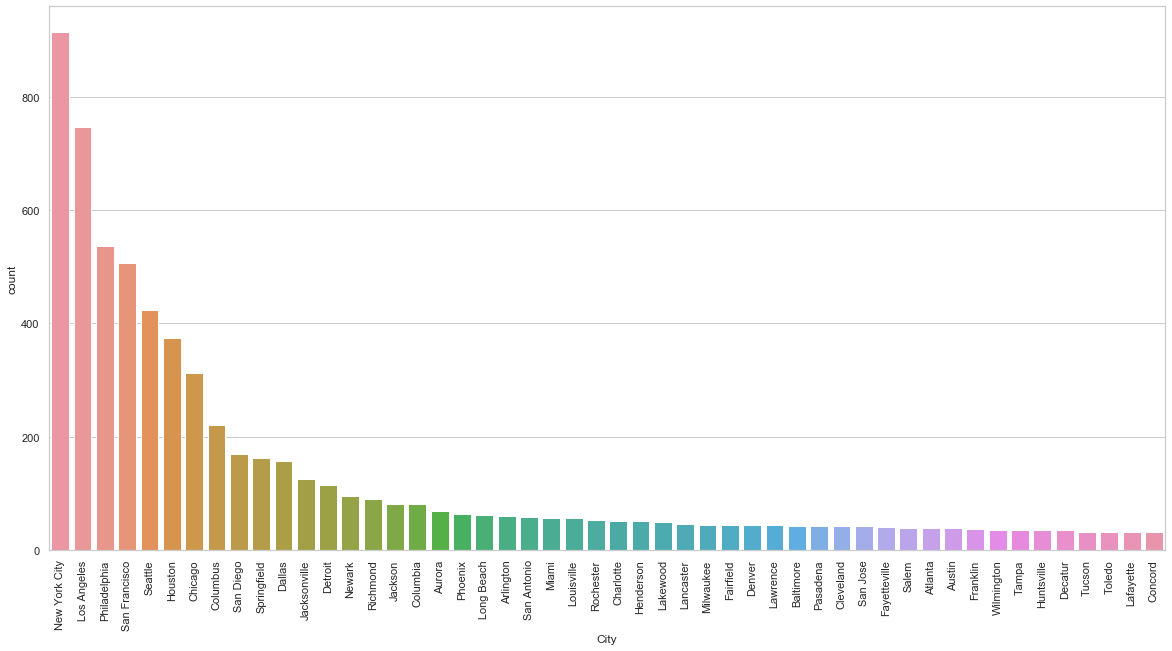

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['City'], order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

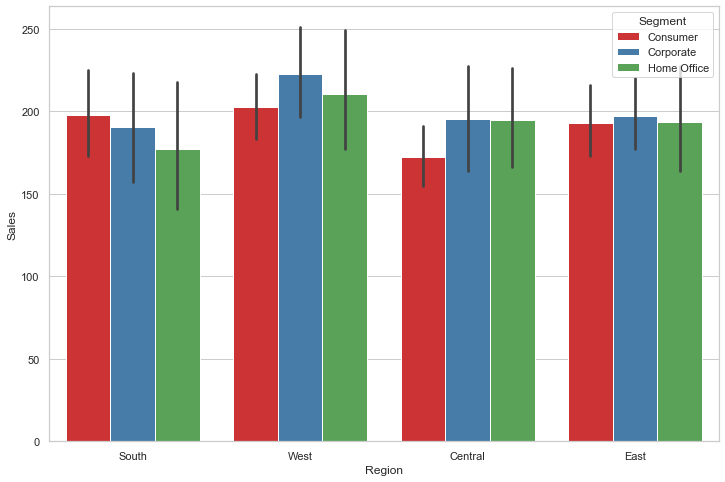

In [37]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="Set1")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

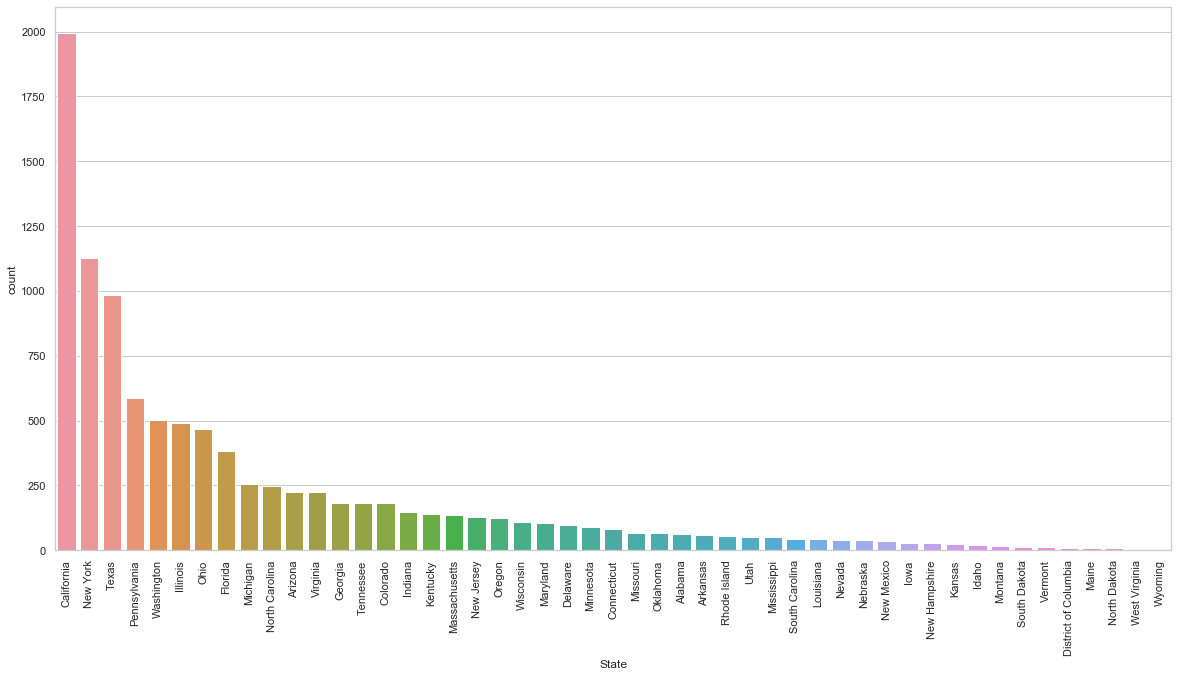

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['State'], order=(df['State'].value_counts().head(50)).index)
plt.xticks(rotation=90)

In [39]:
ds.iplot(x="Sub-Category", y="Sales",kind='bar',colors='orange',
         title='Sub_Category VS Sales',xTitle='Sub_Category',yTitle='Sales')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

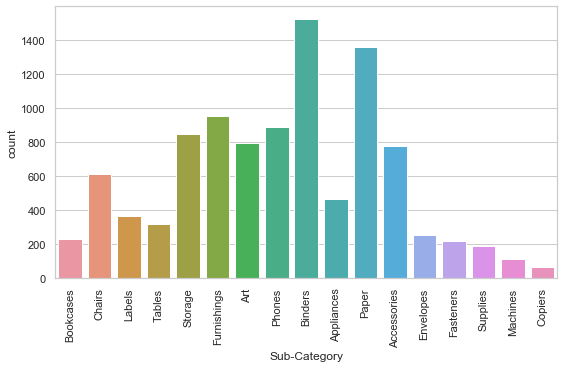

In [40]:
#sns.countplot(x='Sub-Category',data=df)
plt.figure(figsize=(9,5))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

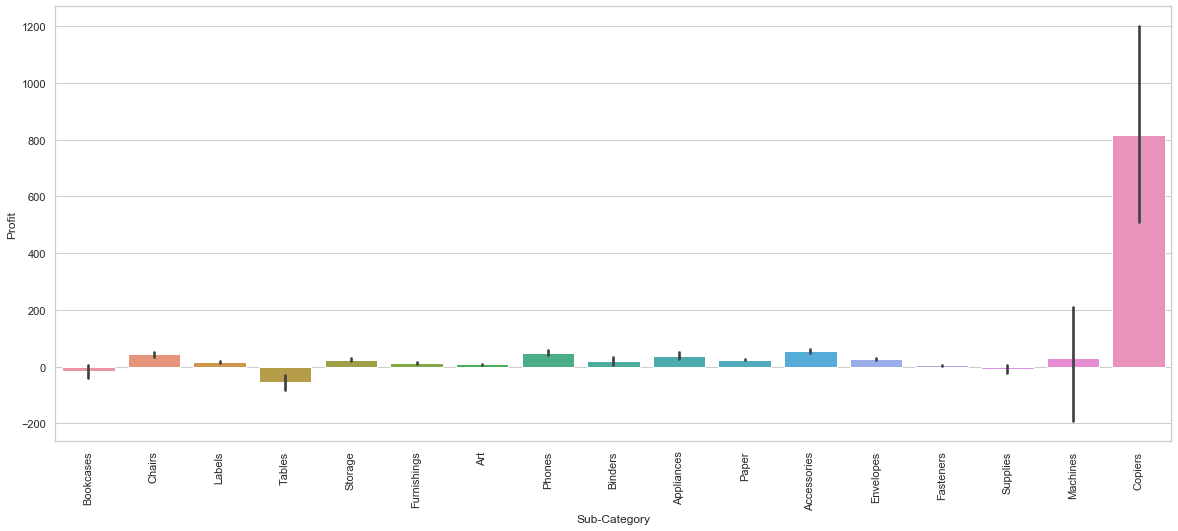

In [41]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])
plt.xticks(rotation=90)

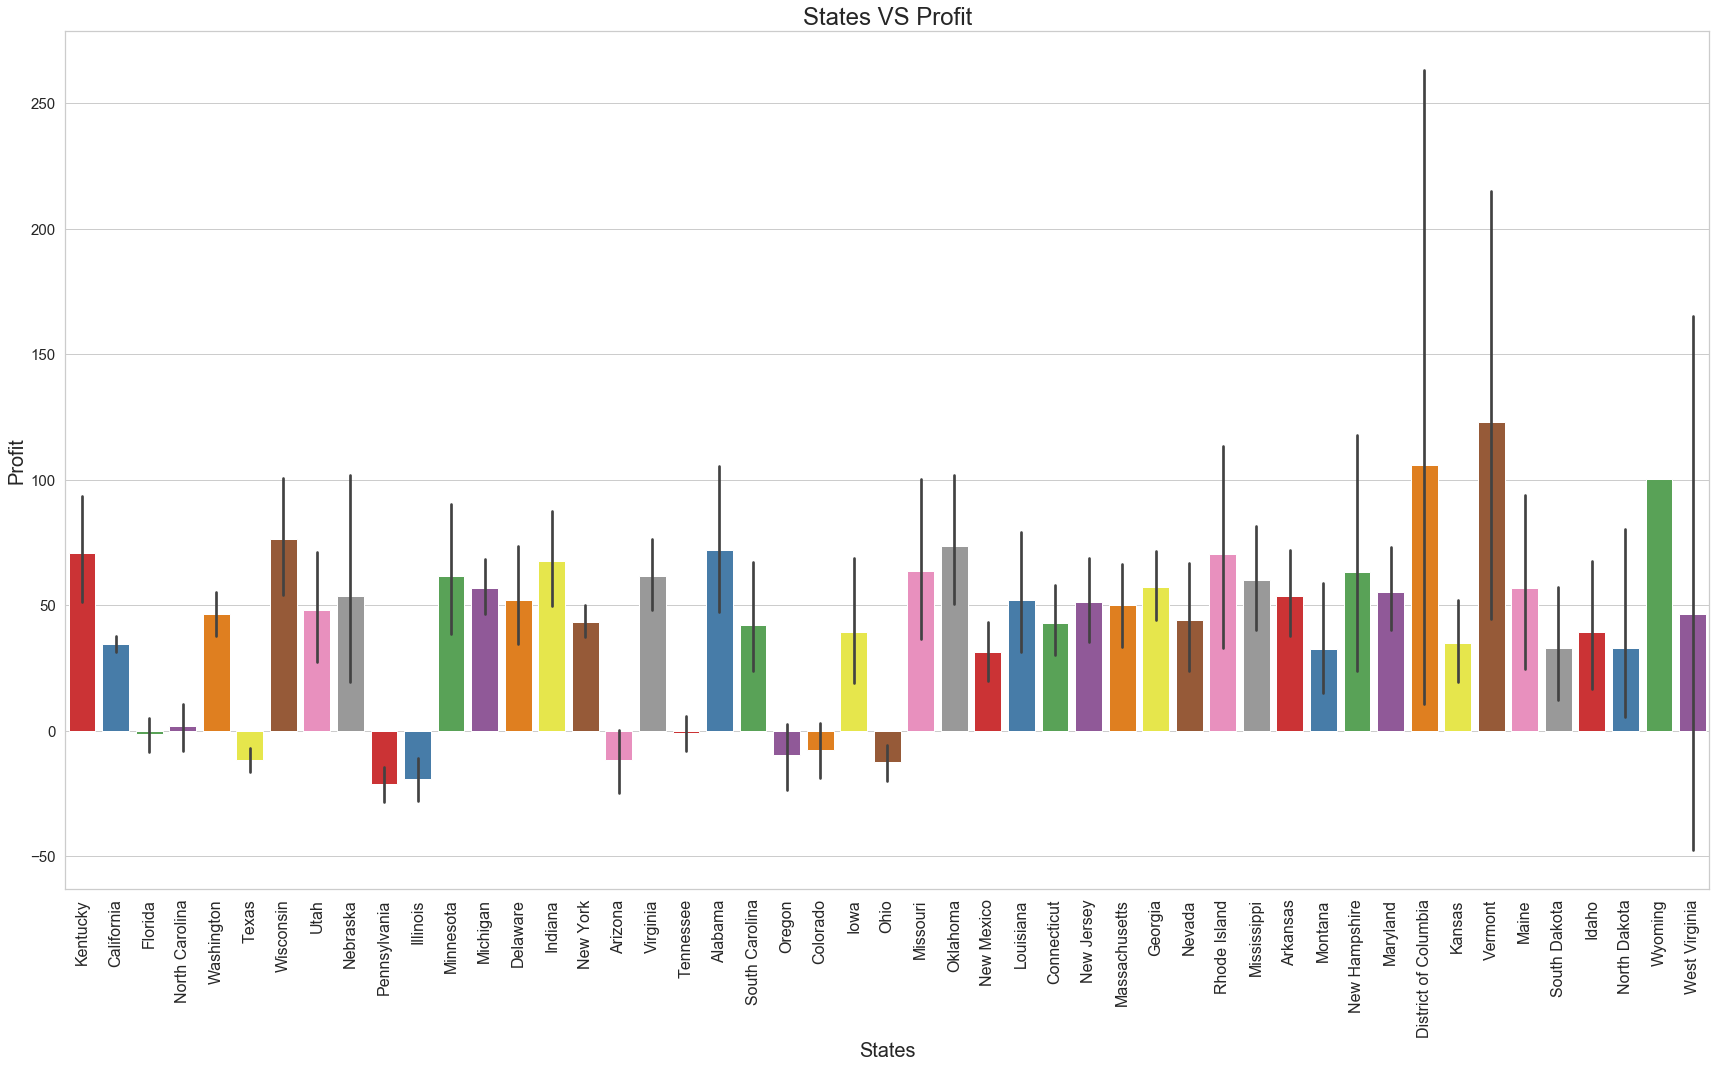

In [42]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="Set1",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

In [43]:
ds.iplot(kind='bar',x="Category", y="Profit",title="Category VS Profit",xTitle="Category",yTitle='Profit',colors='magenta')

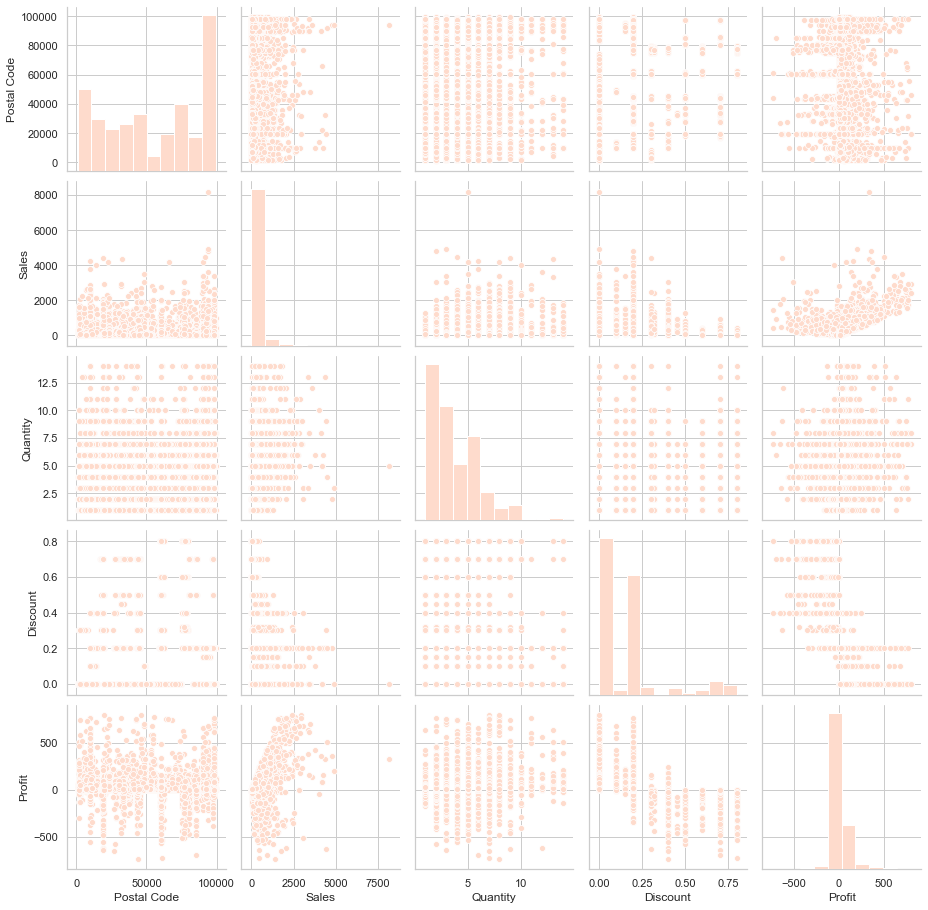

In [44]:
sns.set_palette('Reds')
sns.pairplot(ds)

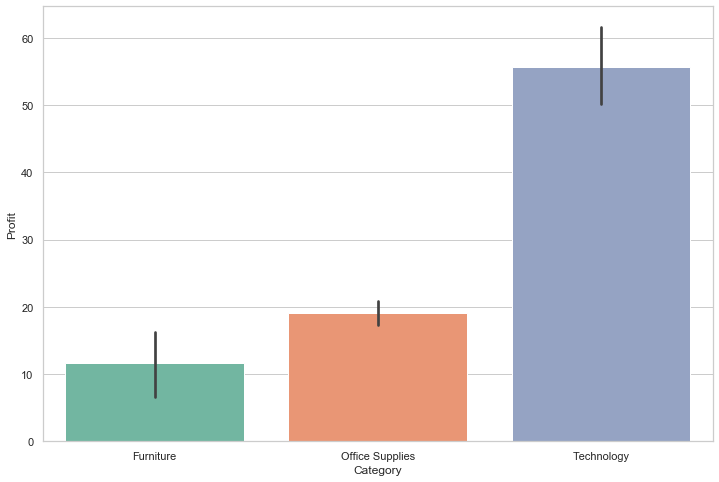

In [45]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=ds, palette="Set2")

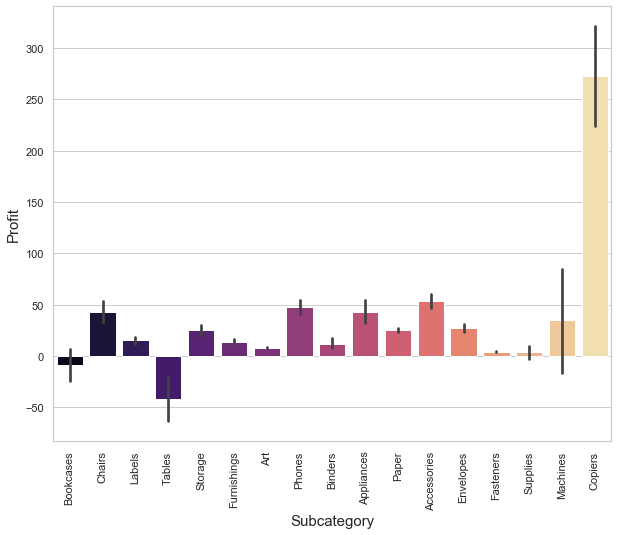

In [46]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="magma")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [47]:
ds_tech=ds[(ds['Category']=="Technology")]

Text(0, 0.5, 'Sales')

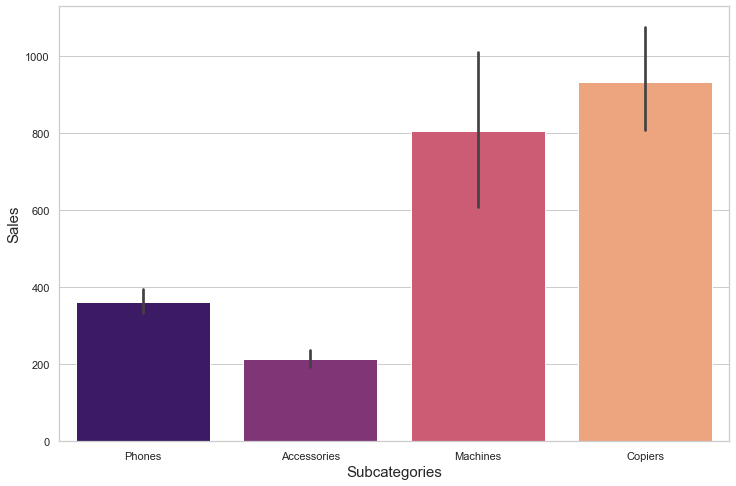

In [48]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=ds_tech, palette="magma")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

Text(0, 0.5, 'Profit')

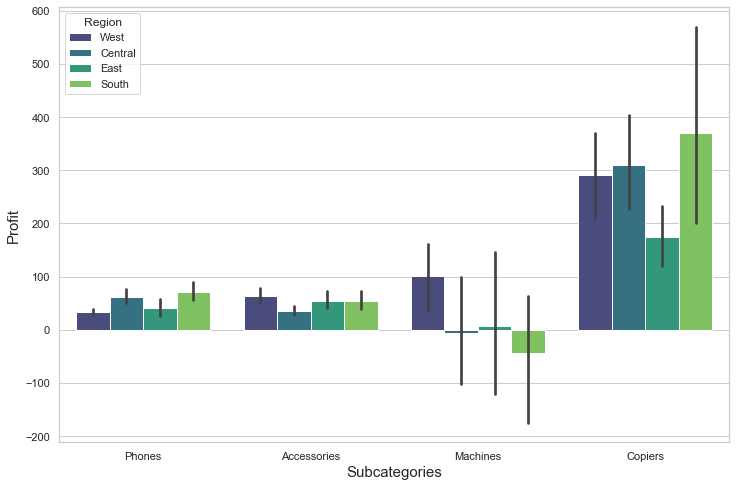

In [49]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="viridis")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

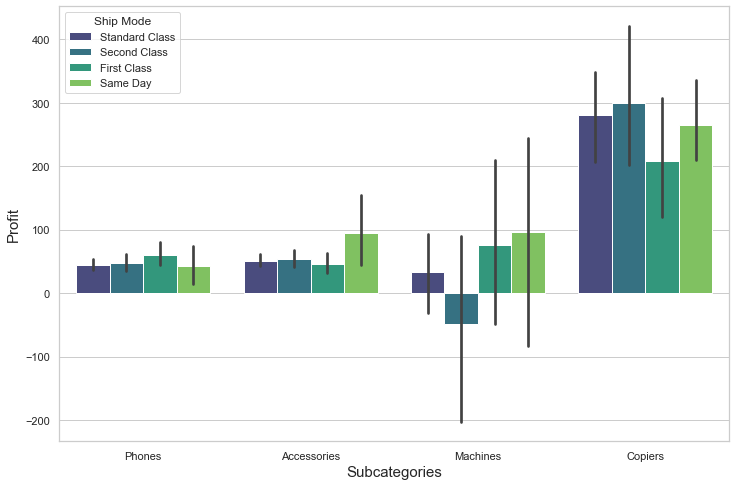

In [50]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Ship Mode", data=ds_tech, palette="viridis")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

## Conclusion

### So, I successfully performed the EDA of the given 'SampleStore' Dataset and finded out the weak areas where I can work to make more profit in the business. 